### Importation des donnees et les librairies

In [1]:
import pandas as pd
from sklearn.datasets import load_iris
import matplotlib.pyplot as plt
import numpy as np
import warnings
warnings.simplefilter("ignore")

iris = load_iris()

X = iris.data
y = iris.target

In [2]:
X[:5] # les données indépendantes: Les features

array([[5.1, 3.5, 1.4, 0.2],
       [4.9, 3. , 1.4, 0.2],
       [4.7, 3.2, 1.3, 0.2],
       [4.6, 3.1, 1.5, 0.2],
       [5. , 3.6, 1.4, 0.2]])

In [3]:
y[:5] # les classes { 0: 'setosa', 1: 'versicolor', 2: 'virginica'}

array([0, 0, 0, 0, 0])

In [4]:
print(iris["target_names"])  # # les noms des classes ['setosa' 'versicolor' 'virginica']

['setosa' 'versicolor' 'virginica']


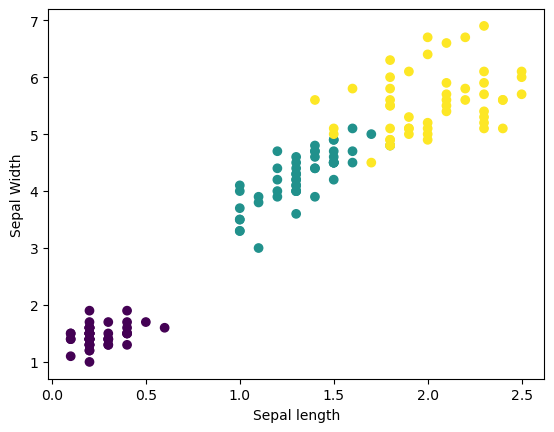

In [5]:
plt.scatter(X[:, 3],X[:, 2], c=y) # Visualisation des données avec scatter plot
plt.xlabel('Sepal length')
plt.ylabel('Sepal Width')
plt.show()

### Pour entrainer un modele if faut splitter les donnees

In [6]:
# Séparer les données en deux portions, Test data et train data en se basant sur le paramètre test_size
# test_size = 0.3 = 70% pour training et 30% pour le test
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size= 0.3, random_state=5)

print("Les donnees d'entrainment : " , X_train.shape)
print("Le % des donnees d'entrainment : " ,(X_train.shape[0]/X.shape[0]) *100 , "%")
print("Les donnees de test : " , X_test.shape)
print("Le % des donnees d'test : " , (X_test.shape[0]/X.shape[0]) *100, "%")

Les donnees d'entrainment :  (105, 4)
Le % des donnees d'entrainment :  70.0 %
Les donnees de test :  (45, 4)
Le % des donnees d'test :  30.0 %


### Visualisatiion des donnees de test et d'entrinement

Text(0.5, 1.0, 'Les donnees de test : ')

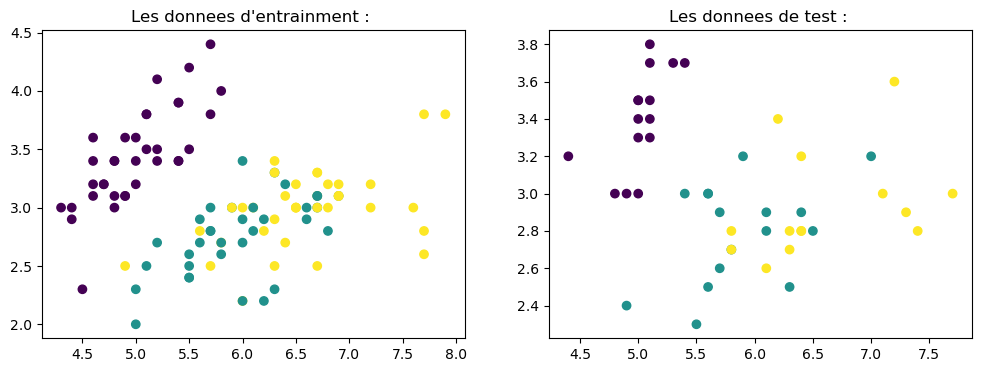

In [7]:
plt.figure(figsize=(12,4))
plt.subplot(121)
plt.scatter(X_train[:, 0], X_train[:, 1], c=y_train)
plt.title("Les donnees d'entrainment : " )
plt.subplot(122)
plt.scatter(X_test[:, 0], X_test[:, 1], c=y_test)
plt.title("Les donnees de test : " )


### Importation du modele et l'enmtrainement

In [8]:
# Importation du modele
from sklearn.neighbors import KNeighborsClassifier
knn = KNeighborsClassifier(n_neighbors=3)

# Apprentissage du modele
knn.fit(X_train, y_train)

print("Le score pour les donnees de training :" , knn.score(X_train, y_train))
print("Le score pour les donnees de test :" , knn.score(X_test, y_test))

Le score pour les donnees de training : 0.9714285714285714
Le score pour les donnees de test : 0.9555555555555556


### Cross validation: La validation croisé

In [9]:
from sklearn.model_selection import cross_val_score
knn = KNeighborsClassifier()
cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy')

array([0.95238095, 0.95238095, 1.        , 0.9047619 , 0.95238095])

In [10]:
cross_val_score(knn, X_train, y_train, cv=5, scoring='accuracy').mean()

0.9523809523809523

In [11]:
knn.fit(X_train, y_train)

KNeighborsClassifier()

In [12]:
print("Le score pour les donnees de test :" , knn.score(X_test, y_test))

Le score pour les donnees de test : 0.9555555555555556


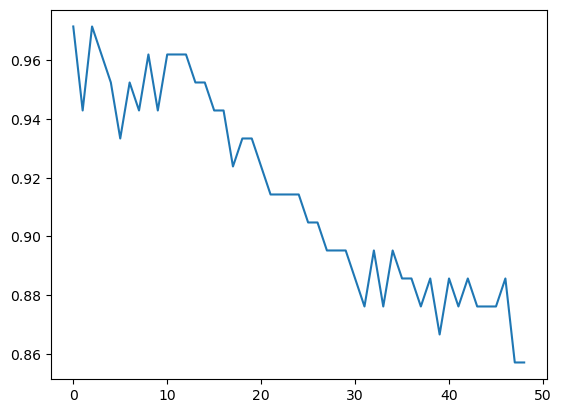

In [13]:
score_final = []
for k in range(1,50):
    score = cross_val_score(KNeighborsClassifier(n_neighbors=k), X_train, y_train, cv=5, scoring='accuracy').mean()
    score_final.append(score)
    
plt.plot(score_final)    

### Validation curve

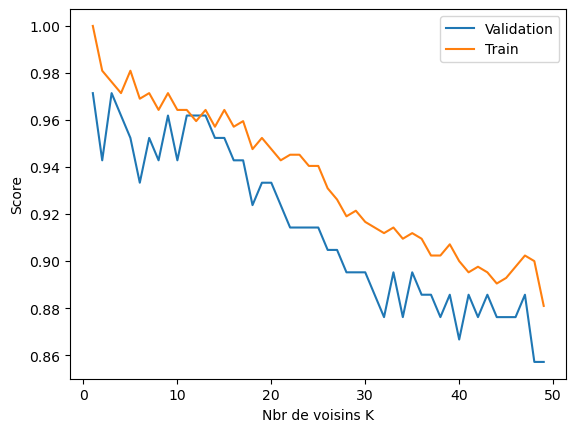

In [14]:
from sklearn.model_selection import validation_curve
knn = KNeighborsClassifier()

k = np.arange(1,50)

train_score, test_score = validation_curve(knn, X_train, y_train,
                                           param_name= 'n_neighbors',
                                           param_range=k,
                                           cv=5)
plt.plot(k, test_score.mean(axis=1), label="Validation")
plt.plot(k, train_score.mean(axis=1), label="Train")
plt.ylabel("Score")
plt.xlabel("Nbr de voisins K")
plt.legend()

### GridSearchCV

In [15]:
from sklearn.model_selection import GridSearchCV

params = {'n_neighbors' : np.arange(1,15),
         'metric' : ['euclidean', 'manhatten']
         }

grid_search_cv = GridSearchCV(KNeighborsClassifier(), params, cv=5)
grid_search_cv.fit(X_train, y_train)

GridSearchCV(cv=5, estimator=KNeighborsClassifier(),
             param_grid={'metric': ['euclidean', 'manhatten'],
                         'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14])})

In [16]:
print(grid_search_cv.best_score_)
print(grid_search_cv.best_params_)

0.9714285714285715
{'metric': 'euclidean', 'n_neighbors': 1}


In [17]:
model = grid_search_cv.best_estimator_
print(model)

KNeighborsClassifier(metric='euclidean', n_neighbors=1)


In [18]:
model.score(X_test, y_test)

0.9333333333333333

In [19]:
from sklearn.metrics import confusion_matrix

y_predict = model.predict(X_test)
confusion_matrix(y_test, y_predict)

array([[15,  0,  0],
       [ 0, 14,  2],
       [ 0,  1, 13]], dtype=int64)